## Classification

In [126]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [127]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [128]:
def species(label) :
    if label == 0.0 :
        return 'sentosa'
    elif label == 1.0 :
        return 'versicolor'
    elif label == 2.0 :
        return 'virginica'
    
data['species'] = data['target'].apply(species) 

data['species'].value_counts()

sentosa       50
versicolor    50
virginica     50
Name: species, dtype: int64

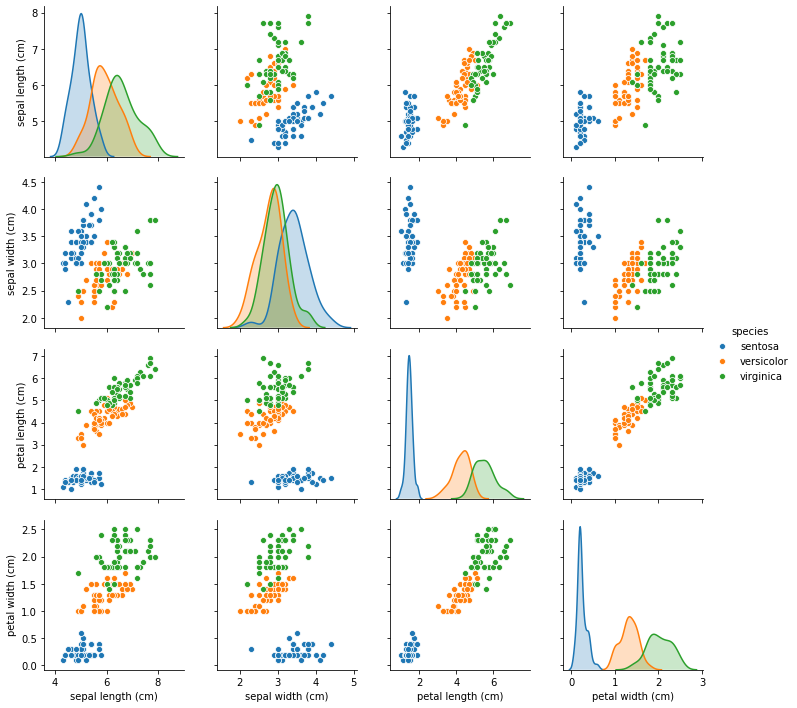

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt       

tmp = data.drop('target', axis=1)
g = sns.pairplot(tmp, hue='species')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [131]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.9111111111111111

In [133]:
print(y_test)
print('\n')
print(predict)

[0 1 1 1 2 2 1 2 1 2 2 2 0 2 2 2 1 1 0 2 0 0 1 0 0 1 0 2 2 1 2 1 0 2 0 2 2
 1 2 2 2 2 1 2 2]


[0 1 1 1 2 2 1 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 1 0 0 1 0 2 2 1 2 1 0 2 0 2 1
 1 2 2 1 2 1 1 2]


# Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

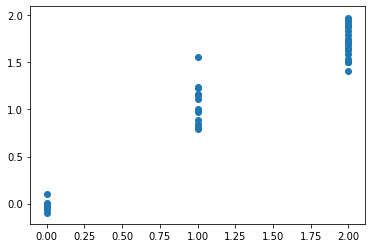

In [135]:
predictions = clf_lr.predict(x_test)
plt.scatter(y_test,predictions)

In [136]:
predict_linear = abs(predictions.round())
print(y_test)
print('\n')
print(predict_linear)

[0 1 1 1 2 2 1 2 1 2 2 2 0 2 2 2 1 1 0 2 0 0 1 0 0 1 0 2 2 1 2 1 0 2 0 2 2
 1 2 2 2 2 1 2 2]


[0. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 0. 0. 1. 0.
 0. 1. 0. 2. 2. 1. 2. 2. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2.]


In [137]:
accuracy_score(y_test,predict_linear)

0.9555555555555556

# Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(x_train,y_train)

/home/not/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
predic_log = clf_log.predict(x_test)
predic_log

array([0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2])

In [173]:
accuracy_score(y_test,predic_log)

0.9111111111111111

In [174]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predic_log)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  4, 18]])

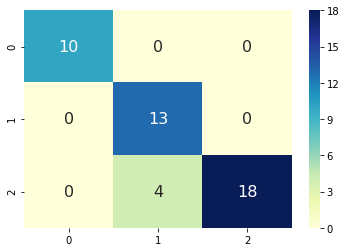

In [142]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predic_log), range(3), range(3))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="YlGnBu")

plt.show()

# K Nearest Neighbors

In [176]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [177]:
knn_pred = knn.predict(x_test)
knn_pred

array([0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2])

In [178]:
accuracy_score(y_test,knn_pred)

0.9555555555555556

In [179]:
confusion_matrix(y_test, knn_pred)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 21]])

In [147]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

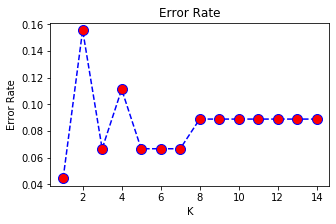

In [175]:
plt.figure(figsize=(5,3))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [149]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [150]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [151]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(data.data,data.target,test_size=0.3)

In [186]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(new_x_train,new_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [188]:
knn_pred = knn.predict(new_x_test)
print(knn_pred != new_y_test)

[False False False  True False False False False False  True False False
 False False False  True False False False False False False False False
 False False False False False  True False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False  True False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False  True
 False  True False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False Fa

In [154]:
accuracy_score(new_y_test,knn_pred)

0.9239766081871345

In [155]:
confusion_matrix(new_y_test, knn_pred)

array([[63,  5],
       [ 8, 95]])

In [156]:
error_rate_new = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(new_x_train,new_y_train)
    pred_i = knn.predict(new_x_test)
    error_rate_new.append(np.mean(pred_i != new_y_test))

Text(0, 0.5, 'Error Rate')

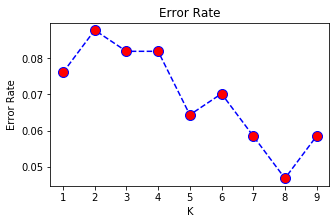

In [180]:
plt.figure(figsize=(5,3))
plt.plot(range(1,10),error_rate_new,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [158]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(new_x_train,new_y_train)
pred = knn.predict(new_x_test)

print('dengan K=1')
print('\n')
print(confusion_matrix(new_y_test,pred))
print('\n')
print(classification_report(new_y_test,pred))
print('\n')

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(new_x_train,new_y_train)
pred = knn.predict(new_x_test)

print('dengan K=9')
print('\n')
print(confusion_matrix(new_y_test,pred))
print(classification_report(new_y_test,pred))
print('\n')

dengan K=1


[[63  5]
 [ 8 95]]


              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.95      0.92      0.94       103

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



dengan K=9


[[ 61   7]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        68
           1       0.93      0.97      0.95       103

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171





# Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(new_x_train,new_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [160]:
tree_pred = dtree.predict(new_x_test)

In [161]:
print(confusion_matrix(new_y_test,tree_pred))
print(classification_report(new_y_test,tree_pred))

[[62  6]
 [14 89]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.94      0.86      0.90       103

    accuracy                           0.88       171
   macro avg       0.88      0.89      0.88       171
weighted avg       0.89      0.88      0.88       171



# Decision Tree Visulization

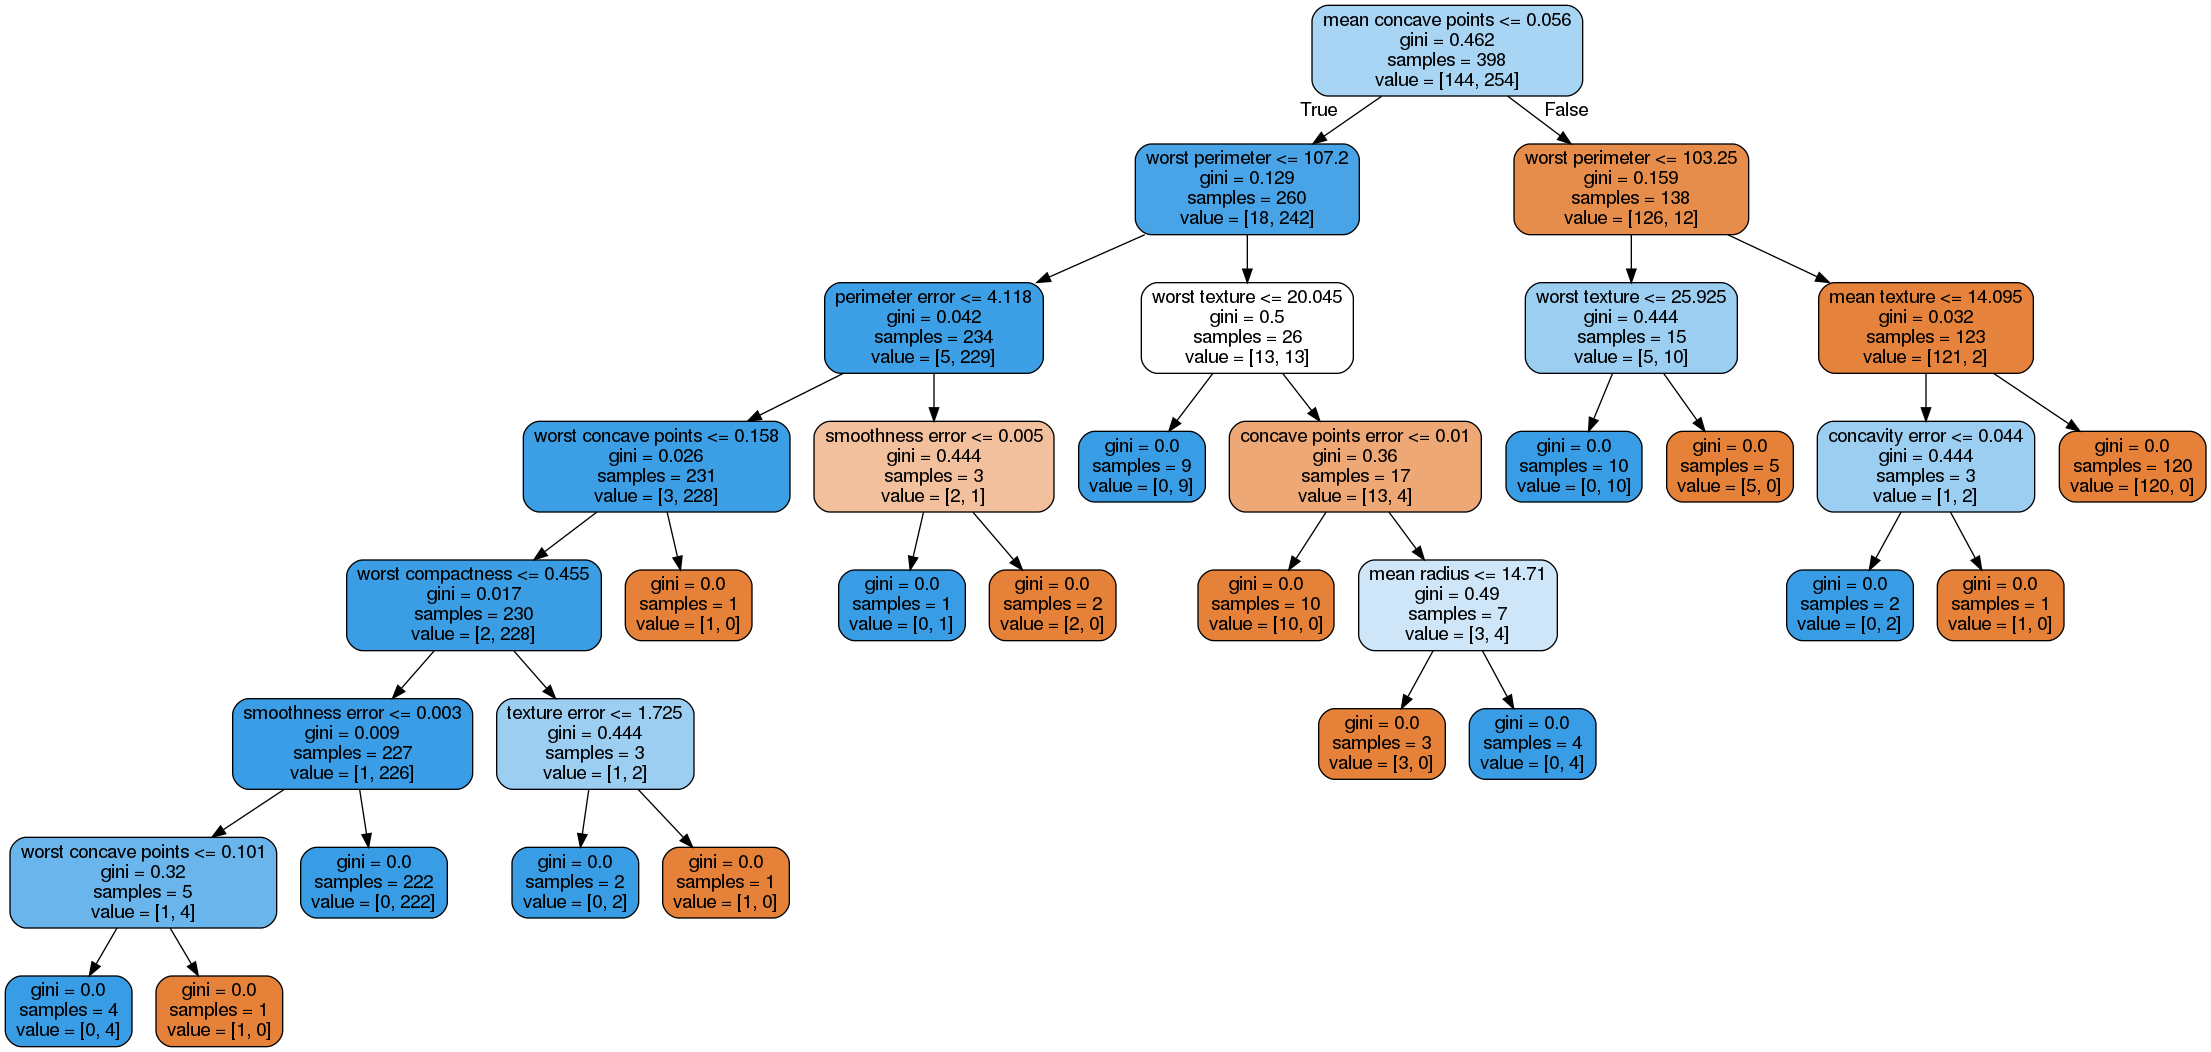

In [162]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=data.feature_names,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [164]:
from sklearn.model_selection import KFold

X_new = data.data
y_new = data.target

scores = []
clf_svm = svm.SVC()
cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(X_new):

    Xx_train, Xx_test = X_new[train_index], X_new[test_index] 
    Yy_train, Yy_test = y_new[train_index], y_new[test_index]
    
    clf_svm.fit(Xx_train, Yy_train)
    scores.append(clf_svm.score(Xx_test, Yy_test))

In [169]:
print(scores)
print('\n')
print(np.mean(scores))

[0.7017543859649122, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9649122807017544, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9821428571428571]


0.9157581453634085


In [170]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(clf_svm, X_new, y_new, cv=10)

print(cross_val)
print('\n')
print(np.mean(cross_val))

[0.89473684 0.84210526 0.89473684 0.92982456 0.92982456 0.92982456
 0.94736842 0.92982456 0.92982456 0.91071429]


0.9138784461152882
